# Assignment 4: Contingency Table

1. Consider three nominal features (one of them, not more, may be taken from nominal features in your data) 
2. Build two contingency tables over them: present a conditional frequency table and Quetelet relative index tables. Make comments on relations between categories of the common (to both tables) feature and two others.
3. Compute and visualize the chi-square-average-Quetelet-index over both tables. Comment on the meaning of the values in the data analysis context. 
4. Tell: what numbers of observations would suffice to see the features as associated at 95% confidence level; at 99% confidence level.

In [321]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["figure.figsize"] = (12,8)

In [322]:
# Load data
hero_agg = pd.read_csv('aggregated_superheroes.csv',sep=';')

# Check NaN values
print("NaN:", hero_agg.isna().values.any()) 
# Check duplicates in names
print("Duplicates:", hero_agg.name.duplicated().any()) 
hero_agg = hero_agg.set_index('name')
hero_agg.head()

NaN: False
Duplicates: False


,intelligence,strength,speed,durability,power,combat,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Dexterity & speed,Healing,Weapon abilities,Brainpower,Energy powers,Sences & Thermal abilities,Psychic abilities,Body features,Space abilities,Defensive abilities,Similiar to magic,God-like abilities
name,,,,,,,,,,,,,,,,,,,,,,,,,,
A-Bomb,38,100,17,80,24,64,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,1,2,0,0,0,0,0,3,0,1,0,0
Abe Sapien,88,28,35,65,100,85,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,3,2,2,1,0,2,1,5,0,0,0,0
Abin Sur,50,90,53,64,99,65,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,0,0,0,0,1,0,0,0,0,0,0,0
Abomination,63,80,53,90,62,95,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,2,2,0,1,0,0,0,2,0,0,1,0
Absorbing Man,38,80,25,100,98,64,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,0,1,0,0,1,2,0,2,0,3,2,0


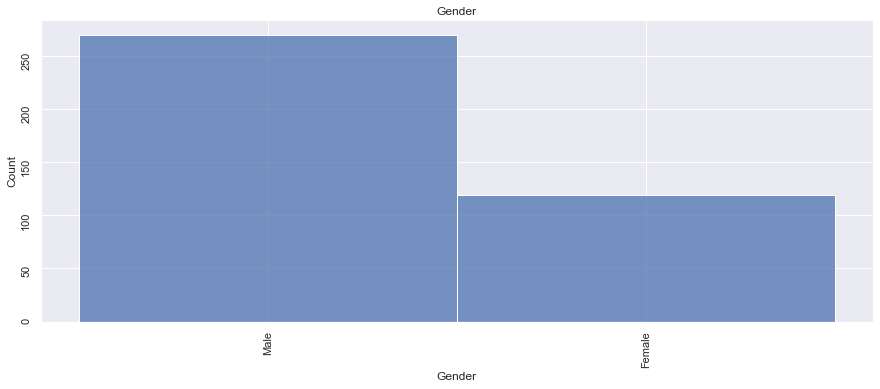

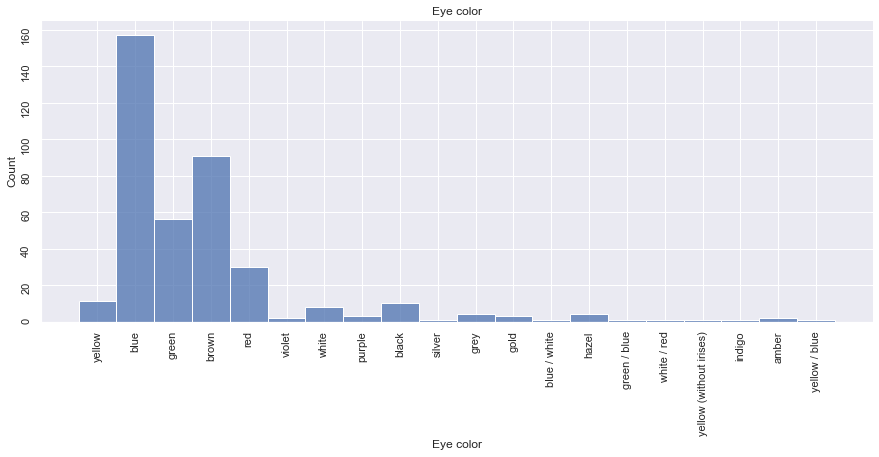

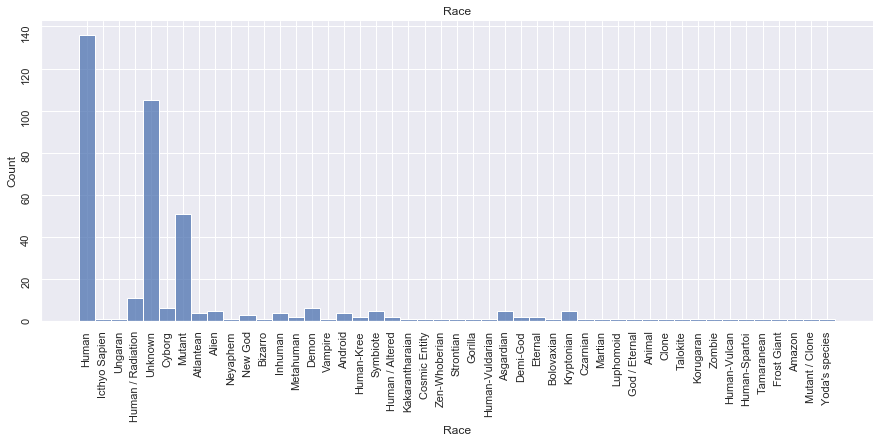

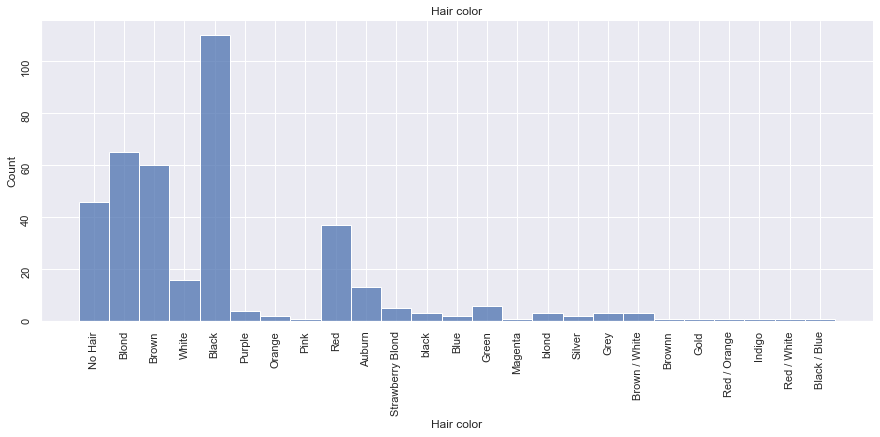

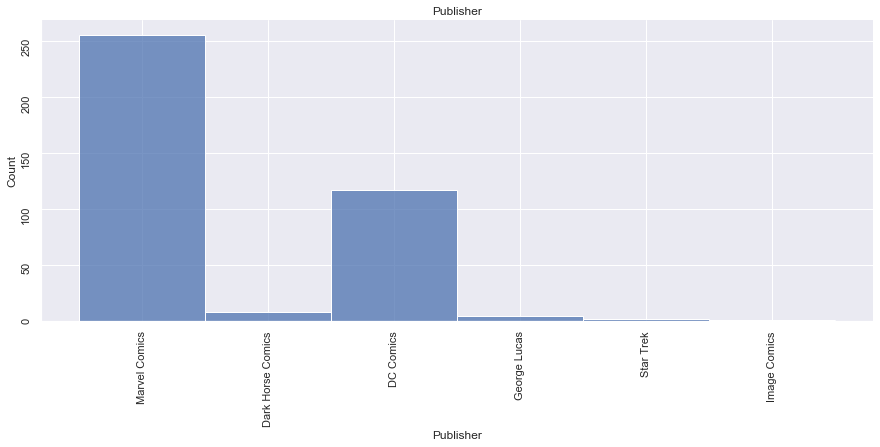

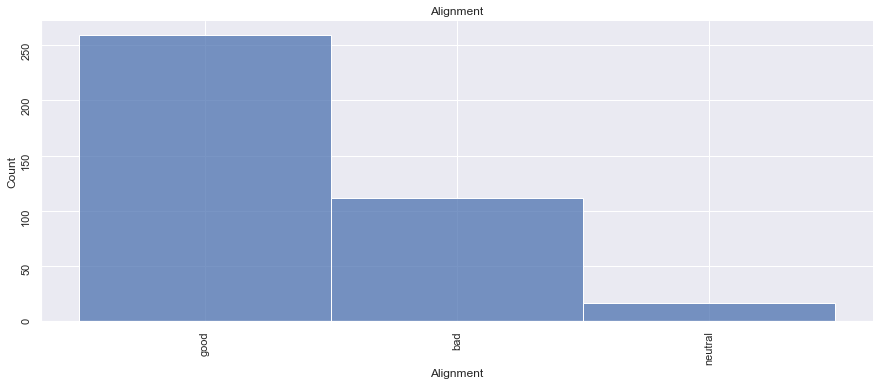

In [323]:
# Plot nominal features distributions
for feat in hero_agg.loc[:,hero_agg.dtypes == 'object'].columns:
    sns.displot(x=feat, data=hero_agg,aspect=2.5)
    plt.tick_params(labelrotation=90)
    plt.title(feat)

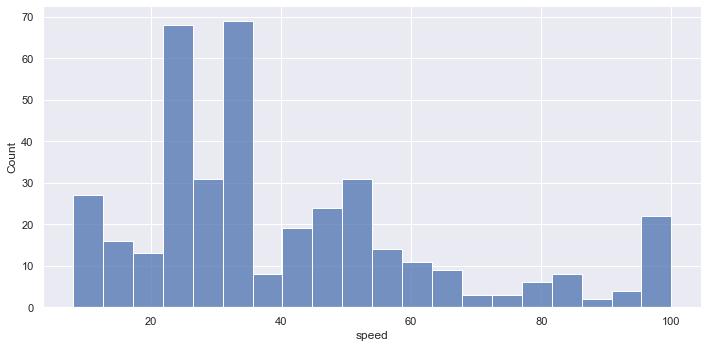

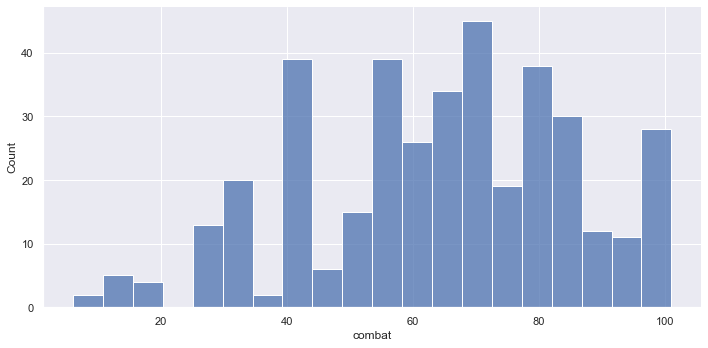

In [324]:
# Plot & save quantitative features distributions
sns.displot(x = 'speed',data = hero_agg,bins=20,aspect=2)
plt.savefig('speed.png')
sns.displot(x = 'combat',data = hero_agg,bins=20,aspect=2)
plt.savefig('combat.png')

In [325]:
# Print histogram bins
np.histogram(hero_agg['speed'],bins=20)

(array([27, 16, 13, 68, 31, 69,  8, 19, 24, 31, 14, 11,  9,  3,  3,  6,  8,
         2,  4, 22]),
 array([  8. ,  12.6,  17.2,  21.8,  26.4,  31. ,  35.6,  40.2,  44.8,
         49.4,  54. ,  58.6,  63.2,  67.8,  72.4,  77. ,  81.6,  86.2,
         90.8,  95.4, 100. ]))

In [326]:
# Print histogram bins
np.histogram(hero_agg['combat'],bins=20)

(array([ 2,  5,  4,  0, 13, 20,  2, 39,  6, 15, 39, 26, 34, 45, 19, 38, 30,
        12, 11, 28]),
 array([  6.  ,  10.75,  15.5 ,  20.25,  25.  ,  29.75,  34.5 ,  39.25,
         44.  ,  48.75,  53.5 ,  58.25,  63.  ,  67.75,  72.5 ,  77.25,
         82.  ,  86.75,  91.5 ,  96.25, 101.  ]))

In [327]:
speed_borders = [8., 17.2, 35.6, 72.4, 86.2, 100.,1000]
combat_borders = [6., 20.25, 34.5, 44., 72.5, 90.8, 101., 1000]

Let's assign labels to categories:

In [328]:
def split_to_categories(df, borders, name):
    categories = pd.Series(dtype=int)
    
    for i in range(len(borders)-1):
        category_indexes = df[(df >= borders[i]) & (df < borders[i+1])].index
        category_size = len(category_indexes)
        category = pd.Series(np.repeat(i,category_size),index=category_indexes)
        categories = categories.append(category)
    categories.name=name
    return categories  

# Creating category labels for speed and combat features
speed_categories = split_to_categories(hero_agg.speed, speed_borders, 'Speed_category')
combat_categories = split_to_categories(hero_agg.combat, combat_borders, 'Combat_category')

In [329]:
# Join 2 new features with labels of speed and combat categories
hero_agg = hero_agg.join([speed_categories,combat_categories])
hero_agg.head()

,intelligence,strength,speed,durability,power,combat,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Dexterity & speed,Healing,Weapon abilities,Brainpower,Energy powers,Sences & Thermal abilities,Psychic abilities,Body features,Space abilities,Defensive abilities,Similiar to magic,God-like abilities,Speed_category,Combat_category
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-Bomb,38,100,17,80,24,64,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,1,2,0,0,0,0,0,3,0,1,0,0,0,3
Abe Sapien,88,28,35,65,100,85,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,3,2,2,1,0,2,1,5,0,0,0,0,1,4
Abin Sur,50,90,53,64,99,65,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,0,0,0,0,1,0,0,0,0,0,0,0,2,3
Abomination,63,80,53,90,62,95,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,2,2,0,1,0,0,0,2,0,0,1,0,2,5
Absorbing Man,38,80,25,100,98,64,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,0,1,0,0,1,2,0,2,0,3,2,0,1,3


Now we can create contingency tables:

In [330]:
contingency_table1 = pd.crosstab(index = hero_agg['Combat_category'], columns=hero_agg['Speed_category'], margins=True)                                                                        
contingency_table1


Speed_category,0,1,2,3,4,5,All
Combat_category,,,,,,,
0,6,2,1,0,1,1,11
1,10,10,7,0,1,5,33
2,3,23,11,1,0,3,41
3,18,83,51,5,2,6,165
4,6,45,35,5,2,6,99
5,0,17,14,6,1,0,38
6,0,1,0,0,0,0,1
All,43,181,119,17,7,21,388


Calculate conditional probabilities p(Combat_category|Speed_category) using normalize parameter:

In [366]:
cond_contingency_table1 = pd.crosstab(index = hero_agg['Combat_category'], columns=hero_agg['Speed_category'], margins=True,
                                normalize='columns')
cond_contingency_table1.style.set_precision(3).highlight_max(color='lightgreen').highlight_min(color='coral')


Speed_category,0,1,2,3,4,5,All
Combat_category,,,,,,,
0,0.140,0.011,0.008,0.000,0.143,0.048,0.028
1,0.233,0.055,0.059,0.000,0.143,0.238,0.085
2,0.070,0.127,0.092,0.059,0.000,0.143,0.106
3,0.419,0.459,0.429,0.294,0.286,0.286,0.425
4,0.140,0.249,0.294,0.294,0.286,0.286,0.255
5,0.000,0.094,0.118,0.353,0.143,0.000,0.098
6,0.000,0.006,0.000,0.000,0.000,0.000,0.003


In [332]:
quetelet_index1 = (cond_contingency_table1[[0,1,2,3,4,5]].div(cond_contingency_table1['All'],axis=0)-1)*100
quetelet_index1.style.set_precision(3).highlight_max(color='lightgreen',axis=0).highlight_min(color='coral')

Speed_category,0,1,2,3,4,5
Combat_category,,,,,,
0,392.178,-61.025,-70.359,-100.000,403.896,67.965
1,173.432,-35.041,-30.838,-100.000,67.965,179.942
2,-33.976,20.253,-12.523,-44.333,-100.000,35.192
3,-1.564,7.832,0.779,-30.838,-32.814,-32.814
4,-45.314,-2.562,15.270,15.270,11.977,11.977
5,-100.000,-4.100,20.124,260.372,45.865,-100.000
6,-100.000,114.365,-100.000,-100.000,-100.000,-100.000


In [373]:
cond_contingency_table2 = pd.crosstab(index = hero_agg['Speed_category'],columns=hero_agg['Alignment'], margins=True,
                                                                                                  normalize='columns')
cond_contingency_table2.style.set_precision(3).highlight_max(color='lightgreen',axis=0).highlight_min(color='coral')

Alignment,bad,good,neutral,All
Speed_category,,,,
0,0.125,0.104,0.118,0.111
1,0.491,0.471,0.235,0.466
2,0.286,0.309,0.412,0.307
3,0.045,0.042,0.059,0.044
4,0.018,0.019,0.000,0.018
5,0.036,0.054,0.176,0.054


In [374]:
quetelet_index2 = (cond_contingency_table2[['bad','good','neutral']].div(cond_contingency_table2['All'],axis=0)-1)*100
quetelet_index2.style.set_precision(3).highlight_max(color='lightgreen',axis=0).highlight_min(color='coral',axis=0)

Alignment,bad,good,neutral
Speed_category,,,
0,12.791,-5.935,6.156
1,5.268,0.975,-49.561
2,-6.843,0.711,34.256
3,1.891,-3.066,34.256
4,-1.020,7.005,-100.000
5,-34.014,-0.129,226.050


Let's calculate chi-square-average-Quetelet-index as average Quetelet index:

In [375]:
(quetelet_index1/100 * cond_contingency_table1[[0,1,2,3,4,5]]).sum().sum()

2.903725609536806

In [376]:
(quetelet_index2/100 * cond_contingency_table2[['bad','good','neutral']]).sum().sum()

0.462148268266149

Chi-squared critical values:

In [386]:
from scipy.stats import chi2
chi2.ppf(0.95, 30), chi2.ppf(0.99, 30)

(43.77297182574219, 50.89218131151707)

In [388]:
chi2.ppf(0.95, 10), chi2.ppf(0.99, 10)

(18.307038053275146, 23.209251158954356)